# Types of Naive Bayes

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_colwidth = 200

## SMS Spam Classifier

In [2]:
sms_data = pd.read_csv('SMSSpamCollection', header=None, sep='\t', names=['Label', 'SMS'])
sms_data.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [3]:
sms_data.shape

(5572, 2)

In [4]:
sms_data_clean = sms_data.copy()    
    

In [5]:
sms_data_clean['SMS'] = sms_data_clean['SMS'].str.replace('\W+', ' ').str.replace('\s+', ' ').str.lower().str.strip()
sms_data_clean['SMS'].head()


0                                                        go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1                                                                                                                                       ok lar joking wif u oni
2    free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s
3                                                                                                                   u dun say so early hor u c already then say
4                                                                                                  nah i don t think he goes to usf he lives around here though
Name: SMS, dtype: object

In [6]:
sms_data_clean['Label'].value_counts(normalize = True)*100

ham     86.593683
spam    13.406317
Name: Label, dtype: float64

In [7]:
# ham = 0, spam = 1 
sms_data_clean['Label'] = sms_data_clean['Label'].apply(lambda x: 1 if x == 'spam' else 0)
sms_data_clean['Label'].head()

0    0
1    0
2    1
3    0
4    0
Name: Label, dtype: int64

### Splitting the data

In [8]:
X = sms_data_clean['SMS']
y = sms_data_clean['Label']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
X_train.shape, X_test.shape

((4457,), (1115,))

In [11]:
X_train.head()

1978                                                    reply to win 100 weekly where will the 2006 fifa world cup be held send stop to 87239 to end service
3989                                                       hello sort of out in town already that so dont rush home i am eating nachos will let you know eta
3935                                                                                                          how come guoyang go n tell her then u told her
4078                                                         hey sathya till now we dint meet not even a single time then how can i saw the situation sathya
4086    orange brings you ringtones from all time chart heroes with a free hit each week go to ringtones pics on wap to stop receiving these tips reply stop
Name: SMS, dtype: object

### Vocabulary

In [12]:
vocabulary = list(i.split() for i in X_train.values)
vocabulary[:2]

[['reply',
  'to',
  'win',
  '100',
  'weekly',
  'where',
  'will',
  'the',
  '2006',
  'fifa',
  'world',
  'cup',
  'be',
  'held',
  'send',
  'stop',
  'to',
  '87239',
  'to',
  'end',
  'service'],
 ['hello',
  'sort',
  'of',
  'out',
  'in',
  'town',
  'already',
  'that',
  'so',
  'dont',
  'rush',
  'home',
  'i',
  'am',
  'eating',
  'nachos',
  'will',
  'let',
  'you',
  'know',
  'eta']]

In [13]:
len(vocabulary)

4457

In [14]:
X_train.head()

1978                                                    reply to win 100 weekly where will the 2006 fifa world cup be held send stop to 87239 to end service
3989                                                       hello sort of out in town already that so dont rush home i am eating nachos will let you know eta
3935                                                                                                          how come guoyang go n tell her then u told her
4078                                                         hey sathya till now we dint meet not even a single time then how can i saw the situation sathya
4086    orange brings you ringtones from all time chart heroes with a free hit each week go to ringtones pics on wap to stop receiving these tips reply stop
Name: SMS, dtype: object

### Preparing Data for Modelling

### TFIDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf = TfidfVectorizer(ngram_range = (1,2), max_features = 8000 )
tfidf.fit(X_train)

TfidfVectorizer(max_features=8000, ngram_range=(1, 2))

In [17]:
X_train_1 = tfidf.transform(X_train)
X_train_1 = X_train_1.toarray()

In [18]:
X_train_1.shape

(4457, 8000)

In [19]:
X_test_1 = tfidf.transform(X_test)
X_test_1.shape

(1115, 8000)

In [20]:
X_test_1 = X_test_1.toarray()

In [21]:
X_test_1.shape

(1115, 8000)

### Model Evaluation Function

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [23]:
def evaluate_model(model):
    
    # Classification Report
    y_pred = model.predict(X_test_1)
    print(classification_report(y_pred, y_test))
    print('*'*50)
    
    #Accuracy Score
    print("Accuracy Score :", accuracy_score(y_pred, y_test))
    print("*"*50)
    
    # Confusion Matrix Heatmap
    cnf_matrix = confusion_matrix(y_pred, y_test)
    labels = ['Positive', 'Negative']
    plt.figure(figsize = (5,5))
    sns.heatmap(cnf_matrix, 
              annot = True, 
              cmap = "Blues", 
              fmt = '',
              xticklabels = labels,
              yticklabels = labels)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    plt.show()

### Gaussian NB


`This approach is built on the assumption of a normal distribution of probabilities. It means, that spam and not-spam classes of messages have frequencies of the words from vocabulary distributed by the Gaussian law:`

In [24]:
from sklearn.naive_bayes import GaussianNB
cl_gauss = GaussianNB()
res_gauss = cl_gauss.fit(X_train_1, y_train)
res_gauss

GaussianNB()

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       933
           1       0.91      0.74      0.82       182

    accuracy                           0.95      1115
   macro avg       0.93      0.86      0.89      1115
weighted avg       0.94      0.95      0.94      1115

**************************************************
Accuracy Score : 0.9452914798206278
**************************************************


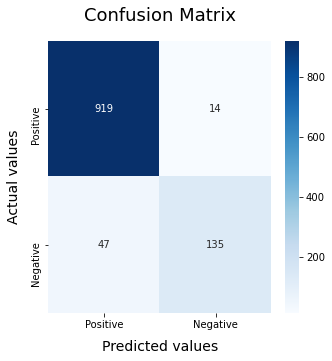

In [25]:
evaluate_model(cl_gauss)

### Multinomial Naive Bayes

`Multinomial classification suits best for the discrete values like word counts. So we expect it to show the best accuracy. In this case distribution of probabilities for each event bases on the formula:`

`Ny is the total number of features of the event y (total number of words in all spam messages), Nyi — count of each feature (summary number of repetitions of a word in all spam messages), n — the number of features (number of words in the vocabulary) and α is a smoothing Laplace parameter to discard the influence of words absent in the vocabulary. The same formula applies to the set of not-spam messages.`

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
mnb = MultinomialNB()
mnb.fit(X_train_1, y_train)

MultinomialNB()

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       993
           1       0.82      1.00      0.90       122

    accuracy                           0.98      1115
   macro avg       0.91      0.99      0.94      1115
weighted avg       0.98      0.98      0.98      1115

**************************************************
Accuracy Score : 0.9757847533632287
**************************************************


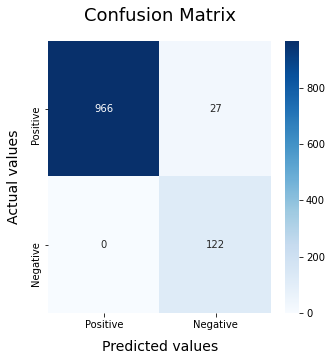

In [28]:
evaluate_model(mnb)

### Complement Naive Bayes

`This approach is almost the same as the Multinomial, though now we count the occurrences of a word in the complement to the class. For example, for the spam message we will count the repetitions of each word in all the non-spam messages:`

`Nc — total number of words in the opposite class (for the spam parameter — number of non-spam words), Nci — repetitions of a word in the opposite class (for a word from spam message — the number of repetitions in all non-spam messages). We also use the same smoothing parameters. After the calculation of basic values we start working with the real parameters:`

In [29]:
from sklearn.naive_bayes import ComplementNB

In [30]:
complement_nb = ComplementNB()
complement_nb.fit(X_train_1, y_train)

ComplementNB()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       973
           1       0.92      0.96      0.94       142

    accuracy                           0.98      1115
   macro avg       0.96      0.98      0.97      1115
weighted avg       0.99      0.98      0.98      1115

**************************************************
Accuracy Score : 0.9847533632286996
**************************************************


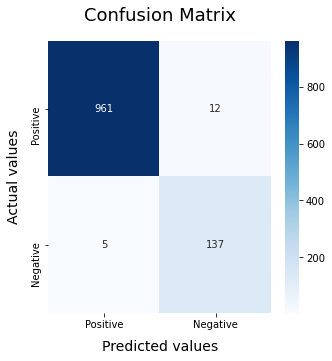

In [31]:
evaluate_model(complement_nb)

### Bernoulli Naive Bayes

`Bernoulli formula is close to the multinomial one, though the input is the set of boolean values (the word is present in the message or not) instead of the set of frequencies.`

`the algorithm explicitly penalizes the non-occurrence of a feature (word in the message is absent in the vocabulary) while the multinomial approach uses the smoothing parameter for the absent values. sklearn Bernoulli algorithm binarizes input values, so, no additional actions required.`

In [32]:
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train_1, y_train)

BernoulliNB()

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       987
           1       0.86      1.00      0.92       128

    accuracy                           0.98      1115
   macro avg       0.93      0.99      0.96      1115
weighted avg       0.98      0.98      0.98      1115

**************************************************
Accuracy Score : 0.9811659192825112
**************************************************


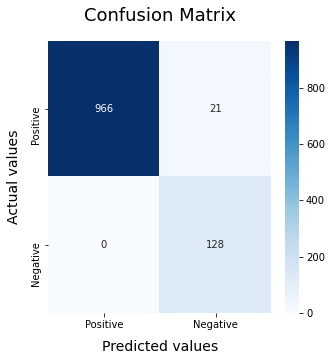

In [33]:
evaluate_model(BNBmodel)

### Categorical Naive Bayes

`Categorical Naive Bayes is suitable for the categorical values — if the example has the set of features or not. In our case, it means, that the vocabulary is treated as the set of features, and the occurrence of a word in the message is treated as the matching with the feature. All formulas are the same as for the multinomial approach but with the occurrences instead of repetitions.`

In [34]:
from sklearn.naive_bayes import CategoricalNB

Thanks

References : https://towardsdatascience.com/comparing-a-variety-of-naive-bayes-classification-algorithms-fc5fa298379e
https://github.com/Midvel/medium_jupyter_notes/blob/master/scikit_bayes/scikit-bayes.ipynb